 Import the requests library. Requests is a python library that can be used to request or get http data. Some useful methods in the requests library are _get_, _post_, and _put_.

In [2]:
import requests

In [3]:
url = 'http://ift.futa.edu.ng/home/profile/322'

A variable called _text_ is created where we add all the text in the url using the utf-8 character encoding format. The utf-8 is a character format that is used by most web pages.

In [4]:
text = requests.get(url).content.decode('utf-8')
print(text[:400])

<!doctype html>
<html class="no-js" lang="">
    <head>
        <!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-104695695-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-104695695-1');
</script>
        <meta charse


The _html.parser_ is a python library that has a module _HTMLParser _that can be used to parse html files.
The html parser is an interpreter that breaks the html data into smaller text elements for easy use.

The class _MyHTMLParser_ uses the inbuilt HTMLParser to strip the data of words with tags. html tags are markup language indicators of the beginning and end of html objects.

In [5]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 AKINRINWA SADURA PRISCILLA  |FUTA   Staff Portal  Email FUTA Home Home Staff Gallery Video Contact Courseware				                										 Download Courses COURSEWARE Courseware Home / Staff Directory / Staff Profile - (AKINRINWA SADURA PRISCILLA) AKINRINWA SADURA PRISCILLA										 DEPT HOME
										 Basic Profile Academic History Awards Experience Publications Profile Fullname:  AKINRINWA SADURA PRISCILLA Post:  Principal Network Engineer Email Address:  spakinrinwa[at]futa.edu.ng Telephone:  +2348036341134 Nationality:  NIGERIA Affiliation:  Federal University of Technology, Akure Education:  BTech  2008, FUTA - Computer Science            
Mtech 2016, FUTA - Computer Science(Research - Scheduling)             
PhD 2021, FUTA - Computer Science (Research - Deep Learning) Background:  Mrs Sadura Akinrinwa is a Principal Network Engineer at the Department of Information 
Technology, Federal University of Technology, Akure, Nigeria. Her passion for computer science was started at 

The _sys_ module in Python provides various functions and variables that are used to manipulate different parts of the Python runtime environment. 

By importing _sys_, one is able to interact directly with the interpreter and install libraries like the _nlp_rake_ which is required for automatic keyword extraction from text written in any language

In [6]:
import sys
!{sys.executable} -m pip install nlp_rake 
#this is not required if nlp_rake library was previously installed

The nlp_rake is used to further reduce the words to only a few keywords. It selects words with minimum frequecies of two and minimum characters of five, it also selects some words frequently used together with maximum two words.

In [7]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=2,min_chars=5)
words = extractor.apply(text)
words

[('deep learning', 4.0),
 ('computer science', 3.888888888888889),
 ('federal university', 3.75),
 ('technology degree', 3.666666666666667),
 ('improve knowledge', 3.5),
 ('technology', 1.6666666666666667),
 ('research', 1.25),
 ('computing', 1.0),
 ('classification', 1.0),
 ('activities', 1.0)]

Next is to plot a bar graph showing the word usage. There are two different methods implemented. 

('deep learning', 'computer science', 'federal university', 'technology degree', 'improve knowledge', 'technology', 'research', 'computing', 'classification', 'activities')


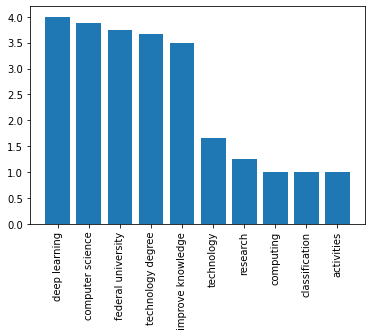

In [8]:
import matplotlib.pyplot as plt

'''
#this is the first way that employed a function
def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(words)

'''
#this is another way that does not use a function
x,y = zip(*words)
print (x)
plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.show()

The wordcloud library is installed

In [9]:
!{sys.executable} -m pip install wordcloud

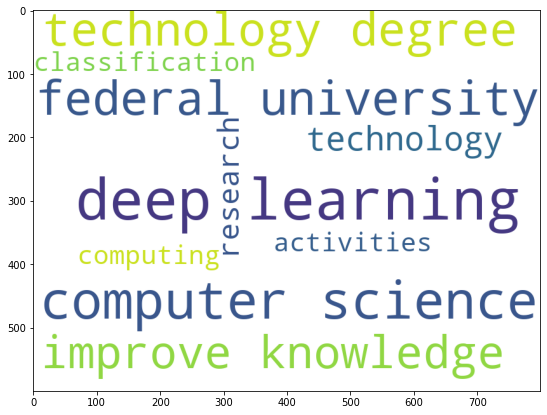

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in words }))

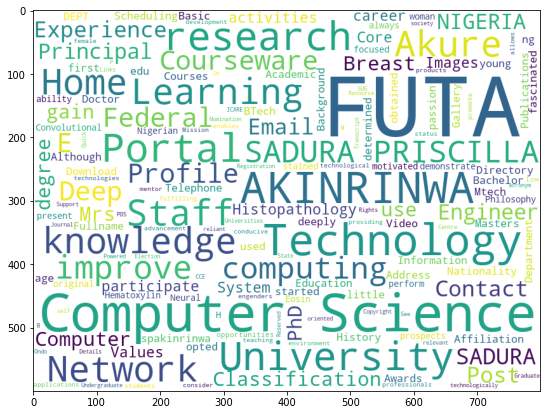

In [12]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))